<a href="https://colab.research.google.com/github/RajuGodavarthy/UCBMLAI-Incident-Resolution-Time-Prediction/blob/main/Incident_Resolution_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict Incident Closure Time Using Machine Learning**

**Objective:**

The primary objective is to predict the estimated closure time of an incident (in hours or days) from its creation, based on the attributes collected from multiple incident stages.

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


**Load Data**

**Source:** UCI Machine Learning Repository

This is an event log of an incident management process extracted from data gathered from the audit system of an instance of the ServiceNowTM platform used by an IT company. The event log is enriched with data loaded from a relational database underlying a corresponding process-aware information system


In [ ]:
# Mounting Google drive to upload the data file

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data from google drive
data = pd.read_csv('/content/drive/MyDrive/UCB-PCMLAI/data/incident_event_log.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

**Data Analysis - Understaning the data and performing data clean up**

In [ ]:
data

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,...,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [ ]:
data.shape

(141712, 36)

In [ ]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [ ]:
data.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [ ]:
# verify missing values
data.isnull().sum()

,0
number,0
incident_state,0
active,0
reassignment_count,0
reopen_count,0
sys_mod_count,0
made_sla,0
caller_id,0
opened_by,0
opened_at,0


**Identify values with '?'**

**Verify any Duplicate data in the dataset**

In [ ]:
data[data.duplicated()]
# No duplicate values

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at


In [ ]:
# validate the data values with '?'
# Initialize an empty dictionary to store counts of rows with '?' for each column
question_mark_counts = {}

# Loop through each column in the DataFrame
for col in data.columns:
    # Count rows where the column contains '?'
    count = (data[col] == '?').sum()
    # Store the count in the dictionary with the column name as the key
    question_mark_counts[col] = count

# Display the counts of rows with '?' for each column
print("Count of rows where each column contains '?':")
for col, count in question_mark_counts.items():
    print(f"Column '{col}': {count} rows contain '?'")

Count of rows where each column contains '?':
Column 'number': 0 rows contain '?'
Column 'incident_state': 0 rows contain '?'
Column 'active': 0 rows contain '?'
Column 'reassignment_count': 0 rows contain '?'
Column 'reopen_count': 0 rows contain '?'
Column 'sys_mod_count': 0 rows contain '?'
Column 'made_sla': 0 rows contain '?'
Column 'caller_id': 29 rows contain '?'
Column 'opened_by': 4835 rows contain '?'
Column 'opened_at': 0 rows contain '?'
Column 'sys_created_by': 53076 rows contain '?'
Column 'sys_created_at': 53076 rows contain '?'
Column 'sys_updated_by': 0 rows contain '?'
Column 'sys_updated_at': 0 rows contain '?'
Column 'contact_type': 0 rows contain '?'
Column 'location': 76 rows contain '?'
Column 'category': 78 rows contain '?'
Column 'subcategory': 111 rows contain '?'
Column 'u_symptom': 32964 rows contain '?'
Column 'cmdb_ci': 141267 rows contain '?'
Column 'impact': 0 rows contain '?'
Column 'urgency': 0 rows contain '?'
Column 'priority': 0 rows contain '?'
Col

In [ ]:
# calculate % of the missing data values with '?' and calculate %

# Initialize an empty dictionary to store counts of rows with '?' for each column
question_mark_pct = {}

# Loop through each column in the DataFrame
for col in data.columns:
    # Count rows where the column contains '?'
    count_pct = (data[col] == '?').sum()/data.shape[0]*100
    # Store the count in the dictionary with the column name as the key
    question_mark_pct[col] = count_pct

# Convert the dictionary to a DataFrame
question_mark_df = pd.DataFrame(list(question_mark_pct.items()), columns=['Column', 'Percentage'])

# Sort the DataFrame by the 'Percentage' column in descending order
sorted_question_mark_df = question_mark_df.sort_values(by='Percentage', ascending=False)

# Display the sorted DataFrame
print("Percentage of rows where each column contains '?' (sorted by descending order):")
print(sorted_question_mark_df)



Percentage of rows where each column contains '?' (sorted by descending order):
                     Column  Percentage
31                caused_by   99.983770
30                   vendor   99.827820
19                  cmdb_ci   99.685983
29                      rfc   99.300694
28               problem_id   98.380518
11           sys_created_at   37.453427
10           sys_created_by   37.453427
18                u_symptom   23.261262
24              assigned_to   19.402732
23         assignment_group   10.029496
8                 opened_by    3.411849
34              resolved_at    2.216467
32              closed_code    0.503839
33              resolved_by    0.159478
17              subcategory    0.078328
16                 category    0.055041
15                 location    0.053630
7                 caller_id    0.020464
22                 priority    0.000000
27                   notify    0.000000
26  u_priority_confirmation    0.000000
25                knowledge    0.000000


In [ ]:
# Drop the below attributes, as majority of the values are missing in those attributes
# caused_by, vendor, cmdb_ci, rfc,  problem_id

data.drop(['caused_by', 'vendor', 'cmdb_ci', 'rfc', 'problem_id'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [ ]:
# Identify unique incident numbers
incidents = len(data.number.unique())
print(incidents)

24918


In [ ]:
# Validate the incident_state attribute
incident_state_counts = data['incident_state'].value_counts()
print(incident_state_counts)

incident_state
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: count, dtype: int64


In [ ]:
# Exclude invalid incident state value '-100'
data=data[data.incident_state!='-100']

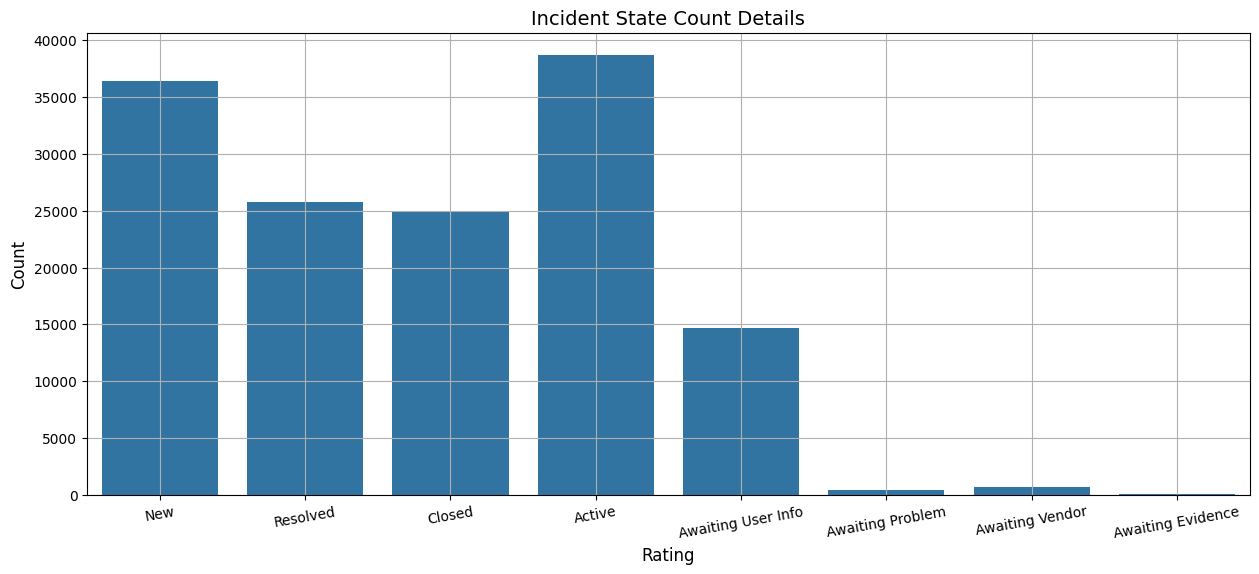

In [ ]:
# Visualize Incident State
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='incident_state', data=data, ax=ax)
plt.title("Incident State Count Details", size = 14)
plt.xlabel("Rating", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=10)
plt.grid()
plt.show()

In [ ]:
# validate attribute 'active', which is status of the incident
active_counts = data['active'].value_counts()
print(active_counts)

active
True     116721
False     24986
Name: count, dtype: int64


Majority of the incidents shows as open

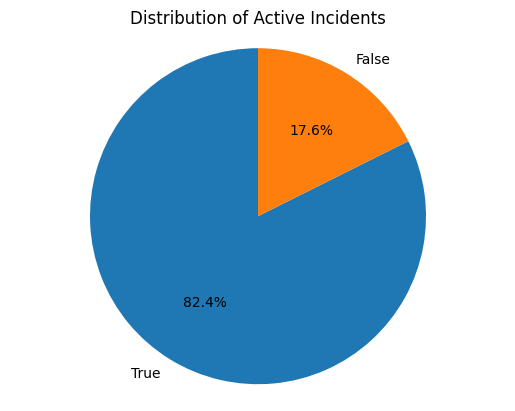

In [ ]:
# visualize instance status

labels = ['True', 'False']

# Create pie chart
plt.pie(active_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Distribution of Active Incidents')

# Ensure circle shape
plt.axis('equal')

# Display the chart
plt.show()

In [ ]:
# Validate the reassignment_count attribute
incident_reassignment_counts = data['reassignment_count'].value_counts()
print(incident_reassignment_counts)

reassignment_count
0     69874
1     37101
2     15097
3      8274
4      4614
5      2595
6      1447
7       985
8       574
9       365
10      285
11      174
12      108
13       61
14       45
15       21
17       16
20       16
16       13
18       13
22        9
19        8
21        3
27        3
23        2
26        2
24        1
25        1
Name: count, dtype: int64


Majority of the incidents has been resolved by the group/support analysts that were assigned initially.

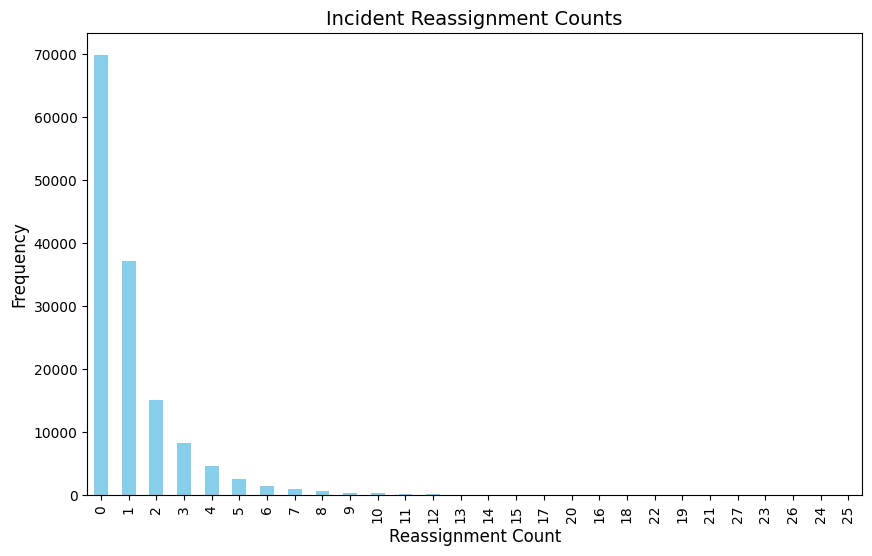

In [ ]:
# Plotting "reassignment counts"

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
incident_reassignment_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Incident Reassignment Counts', fontsize=14)
plt.xlabel('Reassignment Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [ ]:
# Validate "reopen_count" : number of times the incident resolution was rejected by the caller
incident_reopen_counts = data['reopen_count'].value_counts()
print(incident_reopen_counts)

reopen_count
0    139393
1      1918
2       190
3       107
4        48
5        24
6        18
7         5
8         4
Name: count, dtype: int64


Most of the Incidents were resolved successfully, without any rejection of re-opening by the caller

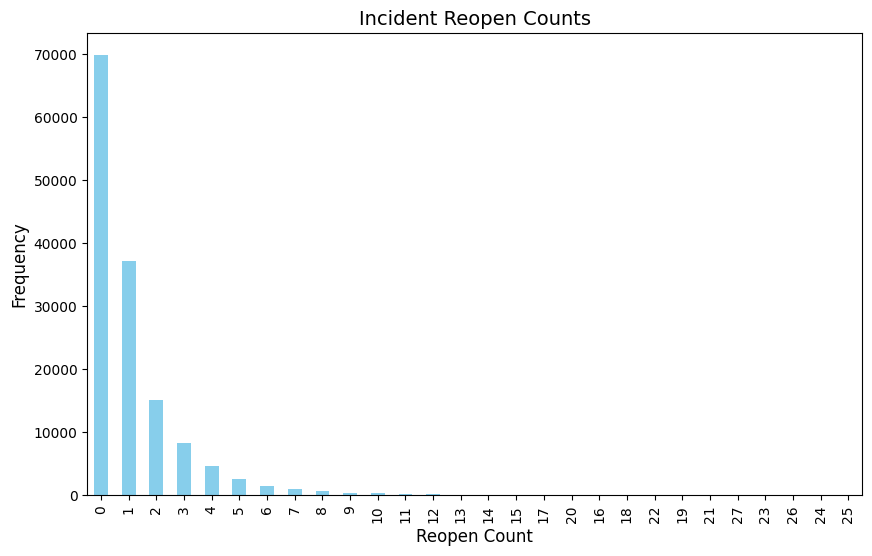

In [ ]:
 # visuallize reopen_count attribute
 # Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
incident_reassignment_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Incident Reopen Counts', fontsize=14)
plt.xlabel('Reopen Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [ ]:
# verify the attribute	sys_mod_count: number of incident updates until that moment
sys_mod_count_counts = data['sys_mod_count'].value_counts()
print(sys_mod_count_counts)

sys_mod_count
0      24913
1      22061
2      19748
3      14168
4      10735
       ...  
84         1
119        1
105        1
106        1
103        1
Name: count, Length: 115, dtype: int64


In [ ]:
# validate the attribute made_sla: that shows whether the incident exceeded the target SLA
made_sla_counts = data['made_sla'].value_counts()
print(made_sla_counts)

print(f"Percentage of Incidents with SLA missed{len(data[data.made_sla==False]['number'].unique())/len(data.number.unique())*100} %")

made_sla
True     132492
False      9215
Name: count, dtype: int64
Percentage of Incidents with SLA missed36.579982342082026 %


Most of the Incidents met SLAs, only ~ 36% of the Incidents missed the SLAs

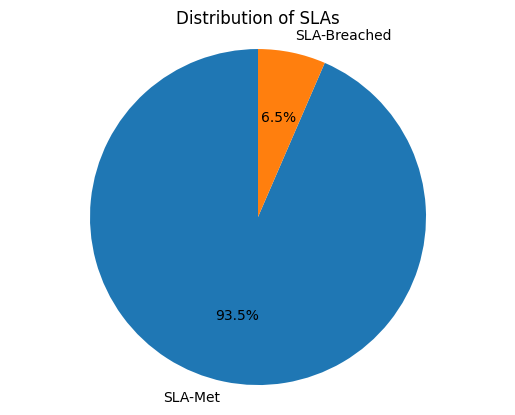

In [ ]:
# visualization of made_sla attribute

labels = ['SLA-Met', 'SLA-Breached']

# Create pie chart
plt.pie(made_sla_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Distribution of SLAs')

# Ensure circle shape
plt.axis('equal')

# Display the chart
plt.show()


In [ ]:
# validate the 'caller_id' - identifier of the user affected
caller_id_counts = data['caller_id'].value_counts()
print(caller_id_counts)

caller_id
Caller 1904    1425
Caller 290      789
Caller 4514     716
Caller 1441     322
Caller 298      293
               ... 
Caller 3545       2
Caller 2913       2
Caller 1502       2
Caller 4696       2
Caller 1899       2
Name: count, Length: 5245, dtype: int64


In [ ]:
len(data.caller_id.unique())

5245

In [ ]:
# drop the caller_id feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['caller_id'],axis=1,inplace=True)

In [ ]:
# validate the attribute 'opened_by' - identifier of the user who reported the incident

opened_by_counts = data['opened_by'].value_counts()
print(opened_by_counts)
print (len(data.opened_by.unique()))

opened_by
Opened by  17     41463
Opened by  24      8063
Opened by  131     7269
Opened by  108     6121
Opened by  55      5655
                  ...  
Opened by  211        3
Opened by  7          3
Opened by  160        3
Opened by  486        3
Opened by  440        3
Name: count, Length: 208, dtype: int64
208


In [ ]:
# drop the opened_by feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['opened_by'],axis=1,inplace=True)

In [ ]:
# validate opened_at: incident user opening date and time

# Convert time-related columns to datetime
data['opened_at'] = pd.to_datetime(data['opened_at'])

# Group by year and count the occurrences
opened_at_year_counts = data['opened_at'].dt.year.value_counts().sort_index()

# Display the grouped data by year
print("Incident counts grouped by year from 'opened_at':")
print(opened_at_year_counts)

Incident counts grouped by year from 'opened_at':
opened_at
2016    140878
2017       829
Name: count, dtype: int64


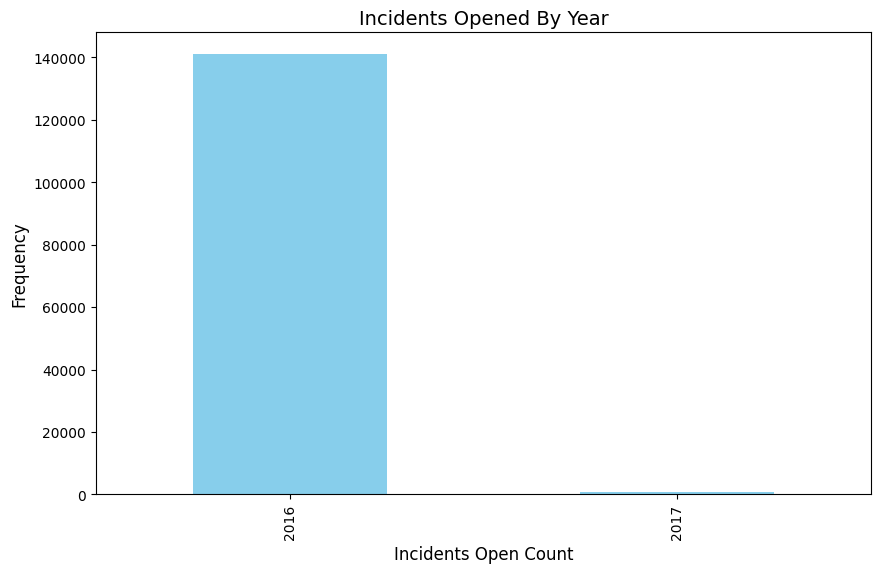

In [ ]:
 # Plot Incidents Open by year
# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
opened_at_year_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Incidents Opened By Year', fontsize=14)
plt.xlabel('Incidents Open Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [ ]:
# validate the attribute - sys_created_by: identifier of the user who registered the incident
sys_created_by_counts = data['sys_created_by'].value_counts()
print(sys_created_by_counts)
print (len(data.sys_created_by.unique()))


sys_created_by
?                 53076
Created by 10     24220
Created by 13      4511
Created by 62      3943
Created by 52      3551
                  ...  
Created by 60         3
Created by 191        3
Created by 194        3
Created by 73         3
Created by 209        3
Name: count, Length: 186, dtype: int64
186


In [ ]:
# drop the sys_created_by feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['sys_created_by'],axis=1,inplace=True)

In [ ]:
# validate the attribute - sys_created_at: incident system creation date and time
sys_created_at_counts = data['sys_created_at'].value_counts()
print(sys_created_at_counts)
print (len(data.sys_created_at.unique()))


sys_created_at
?                  53076
4/7/2016 14:50        56
15/3/2016 15:19       52
19/4/2016 11:32       47
24/5/2016 09:14       47
                   ...  
9/3/2016 18:56         2
8/4/2016 11:28         2
21/3/2016 08:59        2
30/3/2016 20:15        2
26/3/2016 19:33        2
Name: count, Length: 11553, dtype: int64
11553


In [ ]:
# Drop the attribute sys_created_at, at it captures the same time stamp as opened_at attribute
# opened_at attribute will be used to predict the closure time

data.drop(['sys_created_at'],axis=1,inplace=True)


In [ ]:
# validate the attribute sys_updated_by: identifier of the user who updated the incident and generated the current log record
sys_updated_by_counts = data['sys_updated_by'].value_counts()
print(sys_updated_by_counts)
print (len(data.sys_updated_by.unique()))


sys_updated_by
Updated by 908    36162
Updated by 44     12644
Updated by 60      7009
Updated by 429     4169
Updated by 859     2560
                  ...  
Updated by 169        1
Updated by 760        1
Updated by 227        1
Updated by 768        1
Updated by 907        1
Name: count, Length: 845, dtype: int64
845


In [ ]:
# drop the sys_updated_by feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['sys_updated_by'],axis=1,inplace=True)

In [ ]:
# validate the attribute -	sys_updated_at: incident system update date and time

sys_updated_at_counts = data['sys_updated_at'].value_counts()
print(sys_updated_at_counts)
print (len(data.sys_updated_at.unique()))


sys_updated_at
24/3/2016 18:40    420
24/3/2016 19:00    405
24/3/2016 18:51    400
24/3/2016 19:01    393
24/3/2016 18:41    386
                  ... 
13/4/2016 20:06      1
11/4/2016 20:36      1
8/4/2016 22:24       1
22/6/2016 19:26      1
10/4/2016 23:30      1
Name: count, Length: 50660, dtype: int64
50660


In [ ]:
# validate the attribute - contact_type: categorical attribute that shows by what means the incident was reported
contact_type_counts = data['contact_type'].value_counts()
print(contact_type_counts)

contact_type
Phone             140457
Self service         995
Email                220
IVR                   18
Direct opening        17
Name: count, dtype: int64


Most of the customers contacted through the phone

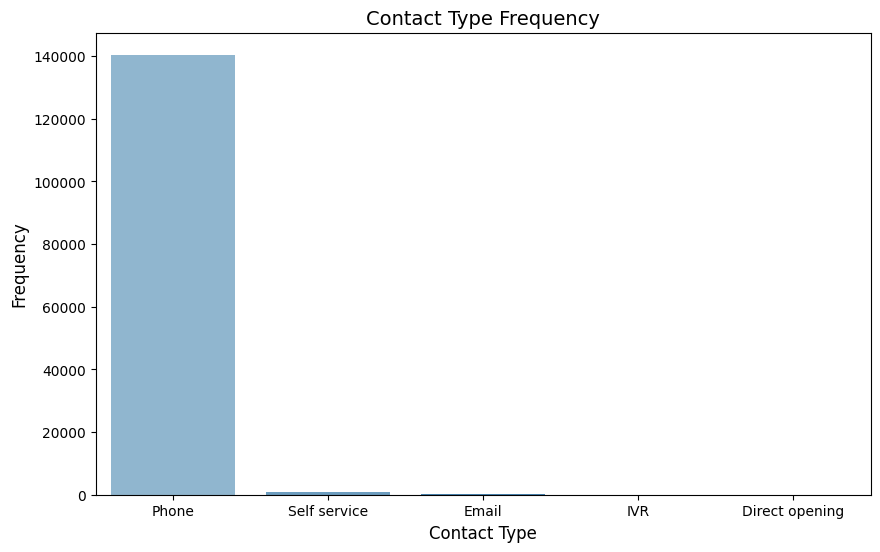

In [ ]:
# Plot Contact Type attribute values

# Convert to a DataFrame
contact_type_df = pd.DataFrame(contact_type_counts)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='contact_type', y='count', data=contact_type_df, palette='Blues_d')

# Add title and labels
plt.title('Contact Type Frequency', fontsize=14)
plt.xlabel('Contact Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.show()


In [ ]:
# validate the attribute - location: identifier of the location of the place affected
location_counts = data['location'].value_counts()
print(location_counts)

location
Location 204    31690
Location 161    22605
Location 143    19245
Location 108    12623
Location 93     11554
                ...  
Location 227        3
Location 211        3
Location 132        2
Location 31         2
Location 166        2
Name: count, Length: 225, dtype: int64


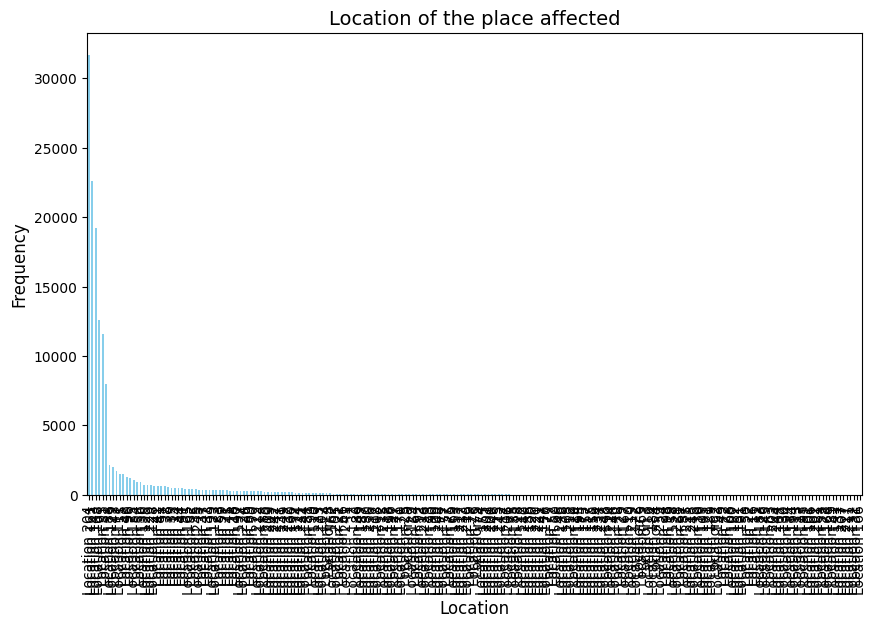

In [ ]:
# plot location attribute
# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
location_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Location of the place affected', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [ ]:
# validate the attribute - category: first-level description of the affected service
category_counts = data['category'].value_counts()
print(category_counts)

category
Category 26    18453
Category 42    15977
Category 53    15968
Category 46    13321
Category 23     7779
Category 9      7365
Category 32     7273
Category 37     6584
Category 57     6532
Category 20     5506
Category 61     5168
Category 24     4561
Category 34     3946
Category 40     3760
Category 45     3619
Category 51     2390
Category 28     2254
Category 35     2037
Category 44     1798
Category 19     1592
Category 13      994
Category 43      858
Category 55      801
Category 17      512
Category 22      420
Category 56      322
Category 38      290
Category 8       264
Category 7       207
Category 33      160
Category 54      139
Category 50       93
Category 31       92
Category 63       78
?                 78
Category 2        77
Category 21       69
Category 47       50
Category 59       42
Category 41       36
Category 29       32
Category 5        31
Category 25       30
Category 62       25
Category 10       24
Category 4        22
Category 52       16
Cate

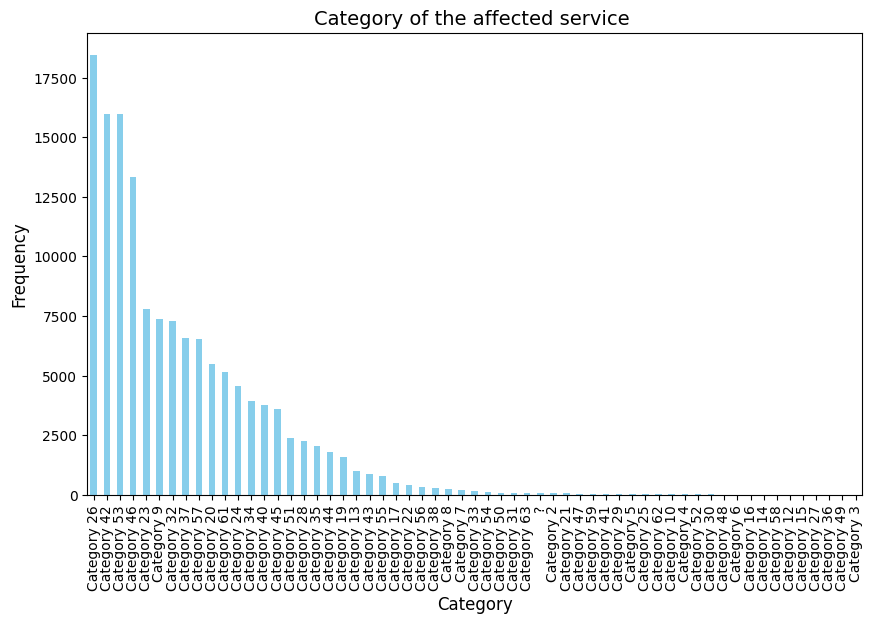

In [ ]:
# visualize
# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
category_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Category of the affected service ', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


In [ ]:
# validate the attribute - subcategory: second-level description of the affected service (related to the first level description, i.e., to category)
subcategory_counts = data['subcategory'].value_counts()
print(subcategory_counts)


subcategory
Subcategory 174    35783
Subcategory 223    15598
Subcategory 175    10496
Subcategory 164     7880
Subcategory 9       4124
                   ...  
Subcategory 116        2
Subcategory 241        1
Subcategory 179        1
Subcategory 264        1
Subcategory 284        1
Name: count, Length: 255, dtype: int64


In [ ]:
#  validate the attribute -	u_symptom: description of the user perception about service availability
u_symptom_counts = data['u_symptom'].value_counts()
print(u_symptom_counts)

u_symptom
Symptom 491    51985
?              32959
Symptom 534     5559
Symptom 387     2583
Symptom 4       2532
               ...  
Symptom 599        1
Symptom 590        1
Symptom 137        1
Symptom 188        1
Symptom 488        1
Name: count, Length: 526, dtype: int64


In [ ]:
# drop the u_symptom feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['u_symptom'],axis=1,inplace=True)

In [ ]:
# validate the attribute - 	impact: description of the impact caused by the incident
impact_counts = data['impact'].value_counts()
print(impact_counts)

impact
2 - Medium    134330
3 - Low         3886
1 - High        3491
Name: count, dtype: int64


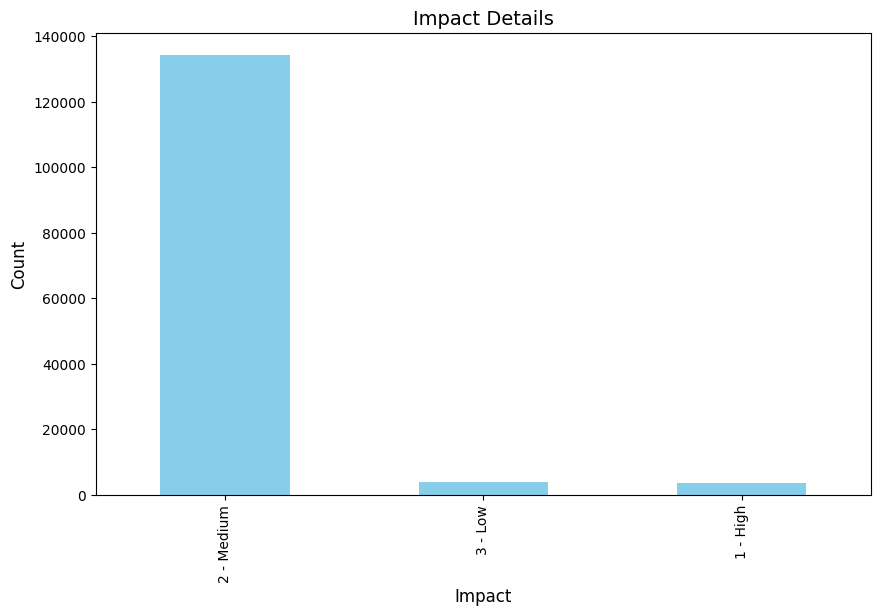

In [ ]:
# Plotting the attribute 'impact'

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
impact_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Impact Details', fontsize=14)
plt.xlabel('Impact', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


urgency
2 - Medium    134089
1 - High        4020
3 - Low         3598
Name: count, dtype: int64


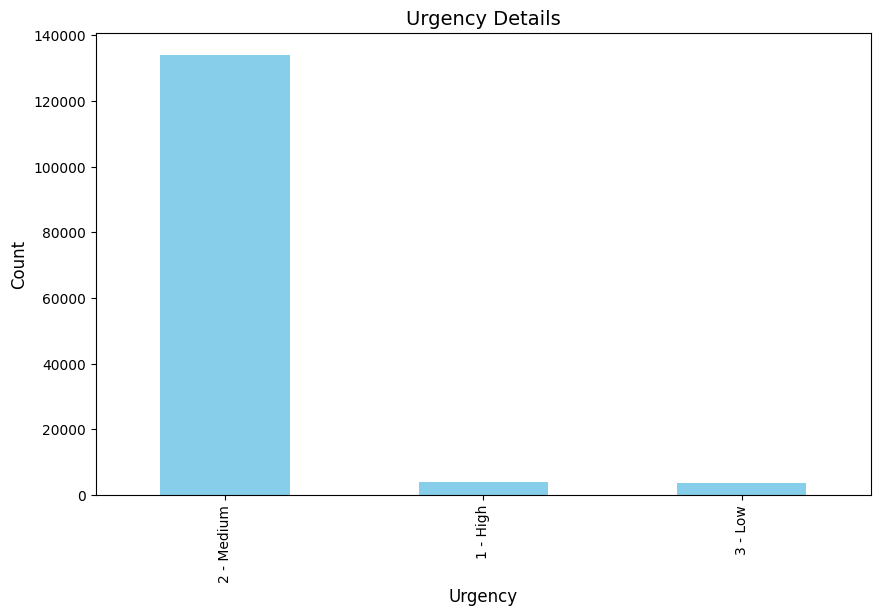

In [ ]:
# validate the attribute - urgency: description of the urgency informed by the user for the incident resolution
urgency_counts = data['urgency'].value_counts()
print(urgency_counts)

# Visualization
# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size
urgency_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Urgency Details', fontsize=14)
plt.xlabel('Urgency', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()





Most of the incidents has been created as medium urgency

In [ ]:
# validate 	priority: calculated by the system based on 'impact' and 'urgency'
priority_counts = data['priority'].value_counts()
print(priority_counts)


priority
3 - Moderate    132447
4 - Low           4030
2 - High          2972
1 - Critical      2258
Name: count, dtype: int64


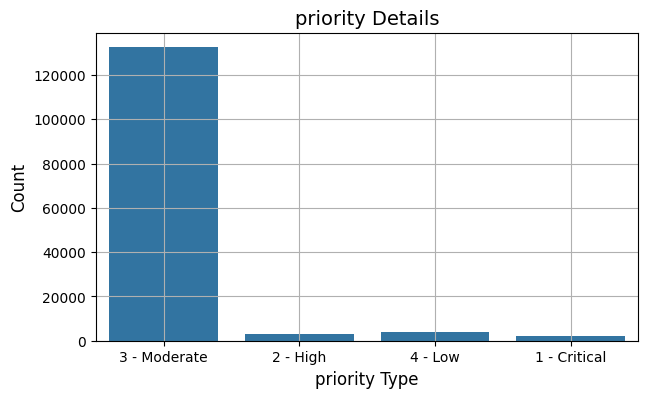

,count
priority,
3 - Moderate,132447
4 - Low,4030
2 - High,2972
1 - Critical,2258


In [ ]:
# validate 	priority: calculated by the system based on 'impact' and 'urgency'

fig_dims = (7, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x =  'priority' , data = data,ax=ax)
plt.title("priority Details", size = 14)
plt.xlabel("priority Type", size=12)
plt.ylabel("Count", size=12)
#plt.xticks(rotation=90)
plt.grid()
plt.show()

# priority counts
data['priority'].value_counts()

Most of the incidents has been created as Moderate Priority

In [ ]:
# validate the attribute - assignment_group: identifier of the support group in charge of the incident
assignment_group_counts = data['assignment_group'].value_counts()
print(assignment_group_counts)

assignment_group
Group 70    43474
?           14213
Group 25     7679
Group 24     6752
Group 20     6170
            ...  
Group 41        3
Group 38        2
Group 11        1
Group 4         1
Group 16        1
Name: count, Length: 79, dtype: int64


In [ ]:
# drop the assignment_group feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['assignment_group'],axis=1,inplace=True)

In [ ]:
# validate the attribute - assigned_to: identifier of the user in charge of the incident
assigned_to_counts = data['assigned_to'].value_counts()
print(assigned_to_counts)

assigned_to
?               27496
Resolver 17     10590
Resolver 13      8802
Resolver 194     3515
Resolver 57      3144
                ...  
Resolver 131        1
Resolver 146        1
Resolver 67         1
Resolver 129        1
Resolver 199        1
Name: count, Length: 235, dtype: int64


In [ ]:
# drop the assigned_to feature from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['assigned_to'],axis=1,inplace=True)

In [ ]:
# validate the attribute - knowledge: boolean attribute that shows whether a knowledge base document was used to resolve the incident
knowledge_counts = data['knowledge'].value_counts()
print(knowledge_counts)

knowledge
False    116344
True      25363
Name: count, dtype: int64


Knowledge base document has been used for most of the cases to resolve them

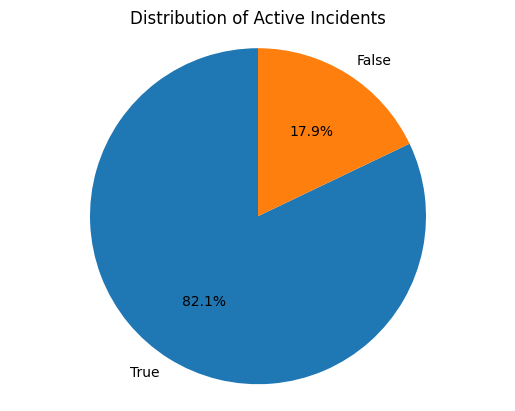

In [ ]:
# Plotting the Knowldge attribue


labels = ['True', 'False']

# Create pie chart
plt.pie(knowledge_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Distribution of Active Incidents')

# Ensure circle shape
plt.axis('equal')

# Display the chart
plt.show()


u_priority_confirmation
False    100735
True      40972
Name: count, dtype: int64


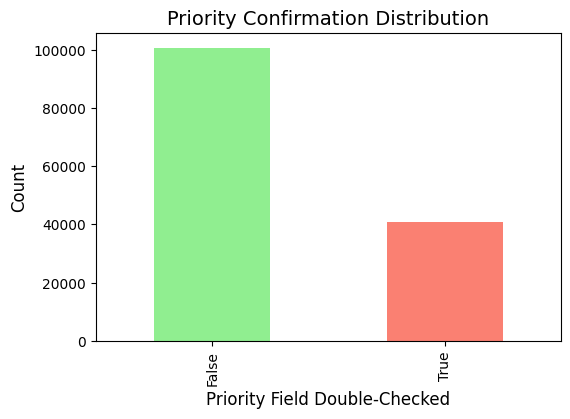

In [ ]:
# validate the attribute - u_priority_confirmation: boolean attribute that shows whether the priority field has been double-checked
u_priority_confirmation_counts = data['u_priority_confirmation'].value_counts()
print(u_priority_confirmation_counts)

# Create the bar plot
plt.figure(figsize=(6, 4))
u_priority_confirmation_counts.plot(kind='bar', color=['lightgreen', 'salmon'])

# Add title and labels
plt.title('Priority Confirmation Distribution', fontsize=14)
plt.xlabel('Priority Field Double-Checked', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

In [ ]:
# validate the attribute - notify: categorical attribute that shows whether notifications were generated for the incident
notify_counts = data['notify'].value_counts()
print(notify_counts)

notify
Do Not Notify    141588
Send Email          119
Name: count, dtype: int64


In [ ]:
# Notifications were not generated for most of the Incidents
# drop this feature, because it has no impact on predicting the Incident resolution time
data.drop(['notify'],axis=1,inplace=True)

In [ ]:
# validate closed_code: identifier of the resolution of the incident
close_code_counts = data['closed_code'].value_counts()
print(close_code_counts)

closed_code
code 6     86583
code 7     20728
code 9     13562
code 8      5646
code 5      4469
code 1      3265
code 10     1678
code 11     1493
code 4      1139
code 16     1091
?            714
code 3       608
code 2       349
code 15      183
code 17      115
code 13       59
code 12       13
code 14       12
Name: count, dtype: int64


In [ ]:
# drop the feature closed_code, because it has no impact on predicting the Incident resolution time
# and will not be available unless the Incident is closed
data.drop(['closed_code'],axis=1,inplace=True)

In [ ]:
#validate the attribute - resolved_by: identifier of the user who resolved the incident
resolved_by_counts = data['resolved_by'].value_counts()
print(resolved_by_counts)

resolved_by
Resolved by 15     15421
Resolved by 11     12050
Resolved by 103     5360
Resolved by 177     3811
Resolved by 53      3637
                   ...  
Resolved by 222        4
Resolved by 17         4
Resolved by 39         3
Resolved by 185        3
Resolved by 48         3
Name: count, Length: 217, dtype: int64


In [ ]:
# drop the feature 'resolved_by' from the dataset because it has no impact on predicting the Incident resolution time
data.drop(['resolved_by'],axis=1,inplace=True)

In [ ]:
# validate the attribute - resolved_at: incident user resolution date and time (dependent variable)
resolved_at_counts = data['resolved_at'].value_counts()
print(resolved_at_counts)

resolved_at
?                  3141
3/6/2016 16:29       93
3/6/2016 16:28       85
3/6/2016 16:27       83
3/6/2016 16:31       59
                   ... 
4/4/2016 08:34        2
18/3/2016 15:21       2
18/3/2016 15:38       2
30/3/2016 02:01       2
17/3/2016 10:21       2
Name: count, Length: 18506, dtype: int64


In [ ]:
# validate the attribute - closed_at: incident user close date and time (dependent variable)
closed_at_counts = data['closed_at'].value_counts()
print(closed_at_counts)

closed_at
24/3/2016 18:59    3324
24/3/2016 18:50    2846
24/3/2016 18:40    2808
24/3/2016 19:00    2780
24/3/2016 19:01    2044
                   ... 
29/4/2016 08:07       2
1/4/2016 20:59        2
5/3/2016 11:00        2
19/5/2016 23:07       2
3/4/2016 04:59        2
Name: count, Length: 2707, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141707 entries, 0 to 141711
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141707 non-null  object        
 1   incident_state           141707 non-null  object        
 2   active                   141707 non-null  bool          
 3   reassignment_count       141707 non-null  int64         
 4   reopen_count             141707 non-null  int64         
 5   sys_mod_count            141707 non-null  int64         
 6   made_sla                 141707 non-null  bool          
 7   opened_at                141707 non-null  datetime64[ns]
 8   sys_updated_at           141707 non-null  object        
 9   contact_type             141707 non-null  object        
 10  location                 141707 non-null  object        
 11  category                 141707 non-null  object        
 12  subcategory          

In [ ]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'opened_at',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'impact', 'urgency', 'priority', 'knowledge', 'u_priority_confirmation',
       'resolved_at', 'closed_at'],
      dtype='object')

**Feature Engineering**

In [ ]:
# # Convert time-related columns to datetime, handling invalid entries like "?"

data['opened_at'] = pd.to_datetime(data['opened_at'], errors='coerce')
data['resolved_at'] = pd.to_datetime(data['resolved_at'], errors='coerce')
data['closed_at'] = pd.to_datetime(data['closed_at'], errors='coerce')
data['sys_updated_at'] =   pd.to_datetime(data['sys_updated_at'], errors='coerce')

# Check the result to make sure conversion worked and "?" are replaced with NaT
print(data[['opened_at','resolved_at', 'closed_at','sys_updated_at']].head())

            opened_at         resolved_at           closed_at  \
0 2016-02-29 01:16:00 2016-02-29 11:29:00 2016-05-03 12:00:00   
1 2016-02-29 01:16:00 2016-02-29 11:29:00 2016-05-03 12:00:00   
2 2016-02-29 01:16:00 2016-02-29 11:29:00 2016-05-03 12:00:00   
3 2016-02-29 01:16:00 2016-02-29 11:29:00 2016-05-03 12:00:00   
4 2016-02-29 04:40:00 2016-03-01 09:52:00 2016-06-03 10:00:00   

       sys_updated_at  
0 2016-02-29 01:23:00  
1 2016-02-29 08:53:00  
2 2016-02-29 11:29:00  
3 2016-03-05 12:00:00  
4 2016-02-29 04:57:00  


In [ ]:
# Identifying the missing values after the initial data clean up
# calculate % of the missing data values with '?' and calculate %

# Initialize an empty dictionary to store counts of rows with '?' for each column
question_mark_pct = {}

# Loop through each column in the DataFrame
for col in data.columns:
    # Count rows where the column contains '?'
    count_pct = (data[col] == '?').sum()/data.shape[0]*100
    # Store the count in the dictionary with the column name as the key
    question_mark_pct[col] = count_pct

# Convert the dictionary to a DataFrame
question_mark_df = pd.DataFrame(list(question_mark_pct.items()), columns=['Column', 'Percentage'])

# Sort the DataFrame by the 'Percentage' column in descending order
sorted_question_mark_df = question_mark_df.sort_values(by='Percentage', ascending=False)

# Display the sorted DataFrame
print("Percentage of rows where each column contains '?' (sorted by descending order):")
print(sorted_question_mark_df)



Percentage of rows where each column contains '?' (sorted by descending order):
                     Column  Percentage
12              subcategory    0.078331
11                 category    0.055043
10                 location    0.053632
1            incident_state    0.000000
18              resolved_at    0.000000
17  u_priority_confirmation    0.000000
16                knowledge    0.000000
15                 priority    0.000000
14                  urgency    0.000000
13                   impact    0.000000
0                    number    0.000000
9              contact_type    0.000000
8            sys_updated_at    0.000000
7                 opened_at    0.000000
6                  made_sla    0.000000
5             sys_mod_count    0.000000
4              reopen_count    0.000000
3        reassignment_count    0.000000
2                    active    0.000000
19                closed_at    0.000000


In [ ]:
# Replace '?' with NaN for easier manipulation
data.replace('?', np.nan, inplace=True)

# Find columns that contain '?' (now NaN) and calculate the number of '?' in each column
columns_with_question_marks = data.columns[data.isna().any()].tolist()

# Count the number of missing ('?') values in each column
missing_values_count = data.isna().sum()

# Filter to only columns that had '?'
question_mark_columns = missing_values_count[missing_values_count > 0]

print("\nColumns with '?' and their counts:")
print(question_mark_columns)




Columns with '?' and their counts:
location          76
category          78
subcategory      111
resolved_at     3141
closed_at      85391
dtype: int64


In [ ]:
# Check if any column still contains '?'
contains_question_mark = (data == '?').any().any()

# If True, print a message
if contains_question_mark:
    print("There are still some '?' values in the dataset.")
else:
    print("No '?' values found in the dataset.")

No '?' values found in the dataset.


In [ ]:
# Check the columns with missing data
print(data.isnull().sum())

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
opened_at                      0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
impact                         0
urgency                        0
priority                       0
knowledge                      0
u_priority_confirmation        0
resolved_at                 3141
closed_at                  85391
dtype: int64


In [ ]:
# Check the columns with missing data
print(data.isnull().sum()/data.shape[0]*100)

number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
opened_at                   0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053632
category                    0.055043
subcategory                 0.078331
impact                      0.000000
urgency                     0.000000
priority                    0.000000
knowledge                   0.000000
u_priority_confirmation     0.000000
resolved_at                 2.216545
closed_at                  60.258844
dtype: float64


**Handle missing values:**

closed_at and resolved_at are important feature to predict the Incident resolution time.

closed_at and resolved_at are missing 60% (high volume) and 2% of the data respectively. These features needs to be handled by imputing with the appropriate values

We will drop rows with missing values in the other features 'location', 'category',and 'subcategory'

In [ ]:
# drop rows with missing values in the other features 'location', 'category',and 'subcategory'
data = data.dropna(subset=['location', 'category', 'subcategory'])

In [ ]:
# Calculate Mean Date , Median Date, Most Frequent Date for resolved_at and closed_at

# Calculate Mean Date
mean_date_resolved = data['resolved_at'].dropna().mean()
mean_date_closed = data['closed_at'].dropna().mean()

# Calculate Median Date
median_date_resolved = data['resolved_at'].dropna().median()
median_date_closed = data['closed_at'].dropna().median()

# Calculate Most Frequent Date
most_frequent_date_resolved = data['resolved_at'].mode()[0] if not data['resolved_at'].mode().empty else None
most_frequent_date_closed = data['closed_at'].mode()[0] if not data['closed_at'].mode().empty else None

# Display results
print(f"Mean Date for 'resolved_at': {mean_date_resolved}")
print(f"Mean Date for 'closed_at': {mean_date_closed}")
print(f"Median Date for 'resolved_at': {median_date_resolved}")
print(f"Median Date for 'closed_at': {median_date_closed}")
print(f"Most Frequent Date for 'resolved_at': {most_frequent_date_resolved}")
print(f"Most Frequent Date for 'closed_at': {most_frequent_date_closed}")

Mean Date for 'resolved_at': 2016-04-24 04:39:26.319172608
Mean Date for 'closed_at': 2016-06-27 12:38:10.701682432
Median Date for 'resolved_at': 2016-04-15 13:19:00
Median Date for 'closed_at': 2016-07-03 17:00:00
Most Frequent Date for 'resolved_at': 2016-06-03 16:29:00
Most Frequent Date for 'closed_at': 2016-08-06 17:07:00


In [ ]:
# Impute missing values with the median date
# which is also robust and typically less affected by outliers

def impute_median_date(series):
    median_date = series.dropna().median()
    return series.fillna(median_date)

data['resolved_at'] = impute_median_date(data['resolved_at'])
data['closed_at'] = impute_median_date(data['closed_at'])

# Display the updated columns
print(data[['resolved_at', 'closed_at']].isnull().sum())

resolved_at    0
closed_at      0
dtype: int64


In [ ]:
# Display the updated columns
print(data[['resolved_at', 'closed_at']].isnull())

        resolved_at  closed_at
0             False      False
1             False      False
2             False      False
3             False      False
4             False      False
...             ...        ...
141707        False      False
141708        False      False
141709        False      False
141710        False      False
141711        False      False

[141596 rows x 2 columns]


**Baseline Model:**

We'll start with a simple baseline model that predicts the mean or median closure time for every incident. This provides a reference for evaluating more complex models.

**Time-based Features:** create features based on the time differences between the incident's opening and closing times.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141596 entries, 0 to 141711
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141596 non-null  object        
 1   incident_state           141596 non-null  object        
 2   active                   141596 non-null  bool          
 3   reassignment_count       141596 non-null  int64         
 4   reopen_count             141596 non-null  int64         
 5   sys_mod_count            141596 non-null  int64         
 6   made_sla                 141596 non-null  bool          
 7   opened_at                141596 non-null  datetime64[ns]
 8   sys_updated_at           141596 non-null  datetime64[ns]
 9   contact_type             141596 non-null  object        
 10  location                 141596 non-null  object        
 11  category                 141596 non-null  object        
 12  subcategory          

**Aggregation Features:** Aggregate features based on incident states or attributes, like reassignment_count, reopen_count, etc.

In [ ]:
# calculate features like total time in different statuses, reassignment counts, and other relevant metrics per incident.

# Sort data by incident and update time
data = data.sort_values(by=['number', 'sys_updated_at'])

# Calculate the time spent in each status
data['time_in_active'] = np.where(data['incident_state'] == 'Active', (data['sys_updated_at'] - data['opened_at']).dt.total_seconds() / 3600, 0)
data['time_in_resolved'] = np.where(data['incident_state'] == 'Resolved', (data['sys_updated_at'] - data['opened_at']).dt.total_seconds() / 3600, 0)
data['time_in_awaiting_user_info'] = np.where(data['incident_state'] == 'Awaiting User Info', (data['sys_updated_at'] - data['opened_at']).dt.total_seconds() / 3600, 0)




In [ ]:
# Aggregate by incident number
agg_data = data.groupby('number').agg({
    'time_in_active': 'sum',
    'time_in_resolved': 'sum',
    'time_in_awaiting_user_info': 'sum',
    'reassignment_count': 'max',
    'reopen_count': 'max',
    'sys_mod_count': 'max',
    'made_sla': 'max',
    'opened_at': 'min',          # First opening time
    'closed_at': 'max'           # Final closure time (target)
}).reset_index()



In [ ]:
# Calculate the total time to close the incident in days

agg_data['time_to_close'] = (agg_data['closed_at'] - agg_data['opened_at']).dt.days

# Calculate the total time to close the incident in hours
#agg_data['time_to_close'] = (agg_data['closed_at'] - agg_data['opened_at']).dt.total_seconds() / 3600

# Merge the aggregated data back into the original data
data = pd.merge(data, agg_data, on='number', how='left')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141596 entries, 0 to 141595
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   number                        141596 non-null  object        
 1   incident_state                141596 non-null  object        
 2   active                        141596 non-null  bool          
 3   reassignment_count_x          141596 non-null  int64         
 4   reopen_count_x                141596 non-null  int64         
 5   sys_mod_count_x               141596 non-null  int64         
 6   made_sla_x                    141596 non-null  bool          
 7   opened_at_x                   141596 non-null  datetime64[ns]
 8   sys_updated_at                141596 non-null  datetime64[ns]
 9   contact_type                  141596 non-null  object        
 10  location                      141596 non-null  object        
 11  category     

In [ ]:
data.head()

,number,incident_state,active,reassignment_count_x,reopen_count_x,sys_mod_count_x,made_sla_x,opened_at_x,sys_updated_at,contact_type,...,time_in_active_y,time_in_resolved_y,time_in_awaiting_user_info_y,reassignment_count_y,reopen_count_y,sys_mod_count_y,made_sla_y,opened_at_y,closed_at_y,time_to_close
0,INC0000045,New,True,0,0,0,True,2016-02-29 01:16:00,2016-02-29 01:23:00,Phone,...,0.0,17.833333,0.000000,0,0,4,True,2016-02-29 01:16:00,2016-05-03 12:00:00,64
1,INC0000045,Resolved,True,0,0,2,True,2016-02-29 01:16:00,2016-02-29 08:53:00,Phone,...,0.0,17.833333,0.000000,0,0,4,True,2016-02-29 01:16:00,2016-05-03 12:00:00,64
2,INC0000045,Resolved,True,0,0,3,True,2016-02-29 01:16:00,2016-02-29 11:29:00,Phone,...,0.0,17.833333,0.000000,0,0,4,True,2016-02-29 01:16:00,2016-05-03 12:00:00,64
3,INC0000045,Closed,False,0,0,4,True,2016-02-29 01:16:00,2016-03-05 12:00:00,Phone,...,0.0,17.833333,0.000000,0,0,4,True,2016-02-29 01:16:00,2016-05-03 12:00:00,64
4,INC0000047,New,True,0,0,0,True,2016-02-29 04:40:00,2016-02-29 04:57:00,Phone,...,44.0,29.200000,28.566667,1,0,8,True,2016-02-29 04:40:00,2016-06-03 10:00:00,95


In [ ]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count_x',
       'reopen_count_x', 'sys_mod_count_x', 'made_sla_x', 'opened_at_x',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'impact', 'urgency', 'priority', 'knowledge', 'u_priority_confirmation',
       'resolved_at', 'closed_at_x', 'time_in_active_x', 'time_in_resolved_x',
       'time_in_awaiting_user_info_x', 'time_in_active_y',
       'time_in_resolved_y', 'time_in_awaiting_user_info_y',
       'reassignment_count_y', 'reopen_count_y', 'sys_mod_count_y',
       'made_sla_y', 'opened_at_y', 'closed_at_y', 'time_to_close'],
      dtype='object')

**Handlig duplicate values after aggregation:**

After aggregation, columns with the suffixes _x and _y represent duplicated features that resulted from merging or joining data.

These suffixes typically arise when performing operations like joins or merges on dataframes, and there are duplicate column names

In [ ]:
columns_to_validate = ['reassignment_count_x', 'reassignment_count_y','reopen_count_x','reopen_count_y','sys_mod_count_x','sys_mod_count_y',
                       'made_sla_x', 'made_sla_y','opened_at_x','opened_at_y','closed_at_x','closed_at_y']
print(data[columns_to_validate].head())

   reassignment_count_x  reassignment_count_y  reopen_count_x  reopen_count_y  \
0                     0                     0               0               0   
1                     0                     0               0               0   
2                     0                     0               0               0   
3                     0                     0               0               0   
4                     0                     1               0               0   

   sys_mod_count_x  sys_mod_count_y  made_sla_x  made_sla_y  \
0                0                4        True        True   
1                2                4        True        True   
2                3                4        True        True   
3                4                4        True        True   
4                0                8        True        True   

          opened_at_x         opened_at_y         closed_at_x  \
0 2016-02-29 01:16:00 2016-02-29 01:16:00 2016-05-03 12:00:00   
1 20

In [ ]:
print(data[columns_to_validate].isnull().sum())

reassignment_count_x    0
reassignment_count_y    0
reopen_count_x          0
reopen_count_y          0
sys_mod_count_x         0
sys_mod_count_y         0
made_sla_x              0
made_sla_y              0
opened_at_x             0
opened_at_y             0
closed_at_x             0
closed_at_y             0
dtype: int64


In [ ]:
print ((data['reassignment_count_x' ].shape))
print ((data['reassignment_count_y' ].shape))
print(data[columns_to_validate].isnull().sum()/data.shape[0]*100)

(141596,)
(141596,)
reassignment_count_x    0.0
reassignment_count_y    0.0
reopen_count_x          0.0
reopen_count_y          0.0
sys_mod_count_x         0.0
sys_mod_count_y         0.0
made_sla_x              0.0
made_sla_y              0.0
opened_at_x             0.0
opened_at_y             0.0
closed_at_x             0.0
closed_at_y             0.0
dtype: float64


Columns with the suffix _x and _y typically refer to columns from the original and aggregated datasets.

You need to decide which version of these columns you want to keep based on the context of the data.

Here the columns with suffix _y has missing values, hence we keep the columns with suffix _x and drop the columns with suffix _y

In [ ]:
# drop columns with suffix _y
columns_to_drop = ['reassignment_count_y','reopen_count_y','sys_mod_count_y','made_sla_y','opened_at_y','closed_at_y']
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count_x',
       'reopen_count_x', 'sys_mod_count_x', 'made_sla_x', 'opened_at_x',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'impact', 'urgency', 'priority', 'knowledge', 'u_priority_confirmation',
       'resolved_at', 'closed_at_x', 'time_in_active_x', 'time_in_resolved_x',
       'time_in_awaiting_user_info_x', 'time_in_active_y',
       'time_in_resolved_y', 'time_in_awaiting_user_info_y', 'time_to_close'],
      dtype='object')

In [ ]:
# drop columns with suffix _y
columns_to_drop1 = ['time_in_active_y','time_in_resolved_y','time_in_awaiting_user_info_y']
data.drop(columns=columns_to_drop1, inplace=True)

In [ ]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count_x',
       'reopen_count_x', 'sys_mod_count_x', 'made_sla_x', 'opened_at_x',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'impact', 'urgency', 'priority', 'knowledge', 'u_priority_confirmation',
       'resolved_at', 'closed_at_x', 'time_in_active_x', 'time_in_resolved_x',
       'time_in_awaiting_user_info_x', 'time_to_close'],
      dtype='object')

In [ ]:
# check for missing data again after data clean up
print(data.isnull().sum())

number                          0
incident_state                  0
active                          0
reassignment_count_x            0
reopen_count_x                  0
sys_mod_count_x                 0
made_sla_x                      0
opened_at_x                     0
sys_updated_at                  0
contact_type                    0
location                        0
category                        0
subcategory                     0
impact                          0
urgency                         0
priority                        0
knowledge                       0
u_priority_confirmation         0
resolved_at                     0
closed_at_x                     0
time_in_active_x                0
time_in_resolved_x              0
time_in_awaiting_user_info_x    0
time_to_close                   0
dtype: int64


In [ ]:
# Remove the '_x' suffix from column names
data.columns = data.columns.str.replace('_x$', '', regex=True)

# Print the updated column names
print(data.columns)

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'opened_at',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'impact', 'urgency', 'priority', 'knowledge', 'u_priority_confirmation',
       'resolved_at', 'closed_at', 'time_in_active', 'time_in_resolved',
       'time_in_awaiting_user_info', 'time_to_close'],
      dtype='object')


**Baseline Model:**

Build a simple baseline model using DummyRegressor, that predicts the mean or median closure time for every incident.

This provides a reference for evaluating more complex models.

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import make_pipeline



In [ ]:
#  Extract useful features from datetime columns
data['opened_at_year'] = data['opened_at'].dt.year
data['opened_at_month'] = data['opened_at'].dt.month
data['opened_at_day'] = data['opened_at'].dt.day
data['closed_at_year'] = data['closed_at'].dt.year
data['closed_at_month'] = data['closed_at'].dt.month
data['closed_at_day'] = data['closed_at'].dt.day

In [ ]:
# Drop unnecessary columns like 'number', 'opened_at', 'closed_at', etc.
data.drop(columns=['number', 'opened_at', 'closed_at', 'resolved_at'], inplace=True)


In [ ]:
data.drop(['sys_updated_at'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141596 entries, 0 to 141595
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   incident_state              141596 non-null  object 
 1   active                      141596 non-null  bool   
 2   reassignment_count          141596 non-null  int64  
 3   reopen_count                141596 non-null  int64  
 4   sys_mod_count               141596 non-null  int64  
 5   made_sla                    141596 non-null  bool   
 6   contact_type                141596 non-null  object 
 7   location                    141596 non-null  object 
 8   category                    141596 non-null  object 
 9   subcategory                 141596 non-null  object 
 10  impact                      141596 non-null  object 
 11  urgency                     141596 non-null  object 
 12  priority                    141596 non-null  object 
 13  knowledge     

In [ ]:
# encoding and transformations of the features
selector =''
selector = make_column_selector(dtype_include=object)

transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), selector),
    remainder=StandardScaler()
)


In [ ]:
# Split the data into train and test sets
X = data.drop(columns=['time_to_close'])  # Predictor features
y = data['time_to_close']  # Target variable (time to close)

In [ ]:
print (X.shape)
print (y.shape)

(141596, 24)
(141596,)


In [ ]:
# Since we are using a DummyRegressor, no actual features are needed, so just use empty features
X_train, X_test, y_train, y_test = train_test_split(X.index, y, test_size=0.2, random_state=42)

In [ ]:
# Ensure 'X_train' and 'X_test' are pandas DataFrames
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
# Fit and Transform the data
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

print(X_train.shape)

(113276, 1)


In [ ]:
# Initialize and fit the DummyRegressor (with mean strategy)
dummy_model = DummyRegressor(strategy='median')

# Fit the model (X_train is not used but passed for compatibility)
dummy_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dummy_model.predict(X_test)

# Evaluate the DummyRegressor
baseline_mae = mean_absolute_error(y_test, y_pred)
baseline_mse = mean_squared_error(y_test, y_pred)

print(f"Baseline Model - MAE: {baseline_mae}")
print(f"Baseline Model - MSE: {baseline_mse}")

Baseline Model - MAE: 52.12757768361582
Baseline Model - MSE: 5187.274187853107


**Baseline Model results Interpretation:**

***1. Mean Absolute Error (MAE): 52.12***

  MAE is the average of the absolute differences between the predicted values and the actual values. In other words, it tells you, on average, how many days the baseline prediction (median closure time) deviates from the actual closure time.

***Interpretation:***
      On average, the baseline model is off by about 38.92 days when predicting
      the incident closure time.
      The lower the MAE, the better the model, since smaller errors indicate better accuracy. For the baseline model, this value sets a benchmark for more advanced models to improve upon.

***2. Mean Squared Error (MSE): 5187.27***

MSE is the average of the squared differences between the predicted and actual values. The squaring penalizes larger errors more than smaller ones, making MSE sensitive to outliers.

***Interpretation:***

The MSE of 2709.18 indicates the average of the squared differences between the predicted and actual closure times.
Larger errors (e.g., an incident predicted to close in 20 days but actually closes in 100 days) have a bigger impact on MSE due to squaring.
Difference from MAE:

MSE is always larger than MAE because it squares the error values, which magnifies larger differences.
MSE helps to highlight cases where the baseline model makes very large errors, which might not be as obvious from the MAE alone.


In [ ]:
data.shape

(141596, 20)

**Simple Model:**

Build a simple model using Linear Regressor to predict the closure time of incidents.

This is a simple model that provides a point of comparison for more complex models, also compare with the Baseline Model

In [ ]:
# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Model (Linear Regression)
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Predict and evaluate the Linear Regression model
y_pred_simple = simple_model.predict(X_test)
simple_mae = mean_absolute_error(y_test, y_pred_simple)
simple_mse = mean_squared_error(y_test, y_pred_simple)

print(f"Simple Model (Linear Regression) - MAE: {simple_mae}")
print(f"Simple Model (Linear Regression) - MSE: {simple_mse}")

Simple Model (Linear Regression) - MAE: 39.34254300949845
Simple Model (Linear Regression) - MSE: 4400.5739056999655


In [ ]:
# Comparison of the Baseline model and Simple model
improvement_mae = baseline_mae - simple_mae
improvement_mse = baseline_mse - simple_mse

print(f"Improvement in MAE: {improvement_mae}")
print(f"Improvement in MSE: {improvement_mse}")

Improvement in MAE: 12.78503467411737
Improvement in MSE: 786.7002821531414


**Summary on Baseline and Simple model comparision:**

The values Improvement in MAE: 12.78503467411737 and Improvement in MSE: 786.7002821531414 indicate how much better the simple model (Linear Regression) performs compared to the baseline model (Dummy Regressor) in terms of prediction accuracy.

*MAE Improvement:* The reduction of the average prediction error by 12.785 units is a substantial gain in prediction accuracy. This suggests that the simple model is significantly more reliable for day-to-day predictions compared to the baseline.

*MSE Improvement:*  A large reduction in MSE (by 786.7 units) indicates that the simple model is much better at reducing large prediction errors compared to the baseline model. This is important in cases where large errors are especially costly or undesirable.

**Conclusion:**
The improvements in both MAE and MSE show that the simple model (Linear Regression) performs much better than the baseline model (Dummy Regressor). It suggests that the Linear Regression model is more suitable for predicting the target variable (incident closure time, in this case), leading to more accurate and reliable predictions